In [ ]:
# Install the required library
!pip install photutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.9/857.9 kB 12.4 MB/s eta 0:00:00


In [ ]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

plt.style.use(astropy_mpl_style)

In [ ]:
# Connect the drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
r_file = get_pkg_data_filename('/gdrive/MyDrive/CC/NGC/frame-r.fit')            # FIT file of the image in r filter
g_file = get_pkg_data_filename('/gdrive/MyDrive/CC/NGC/frame-g.fit')            # FIT file of the image in g filter

r_image = fits.getdata(r_file, ext=0)                                           # Image data in r filter 
g_image = fits.getdata(g_file, ext=0)                                           # Image data in g filter

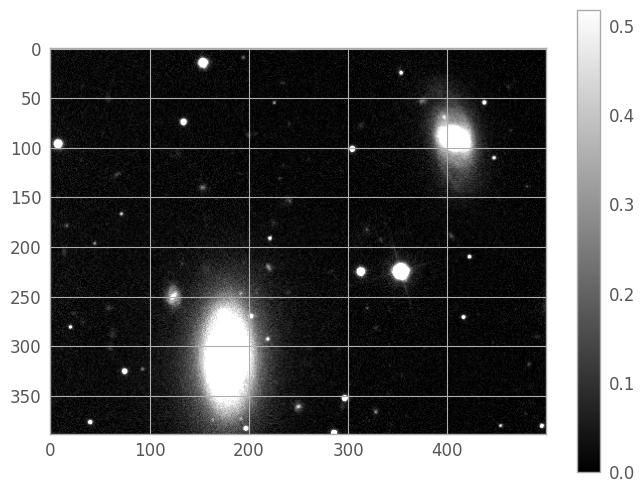

In [ ]:
# The appearance of the image 
plt.figure()
plt.imshow(r_image, cmap='gray', vmin=0, vmax=np.std(r_image))                  # vmax parameter in order to decrease the contrast of the image
plt.colorbar()

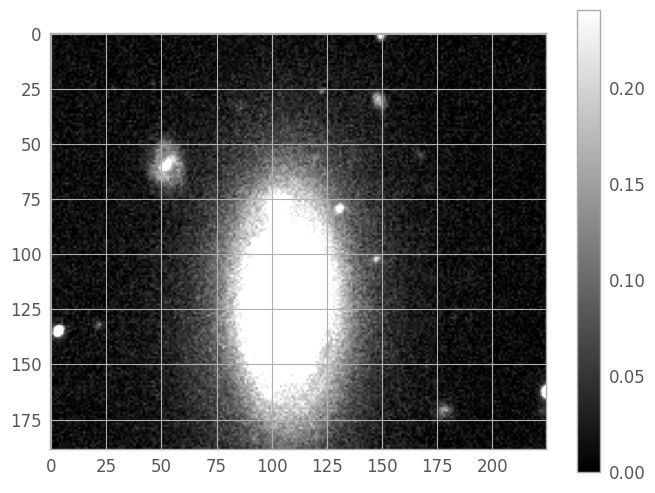

In [ ]:
# Crop the image for NGC7355
NGC7335_g = g_image[200:,75:300]
NGC7335_r = r_image[200:,75:300]

plt.figure()
plt.imshow(NGC7335_g, cmap='gray', vmin=0, vmax=np.std(NGC7335_g))
plt.colorbar()

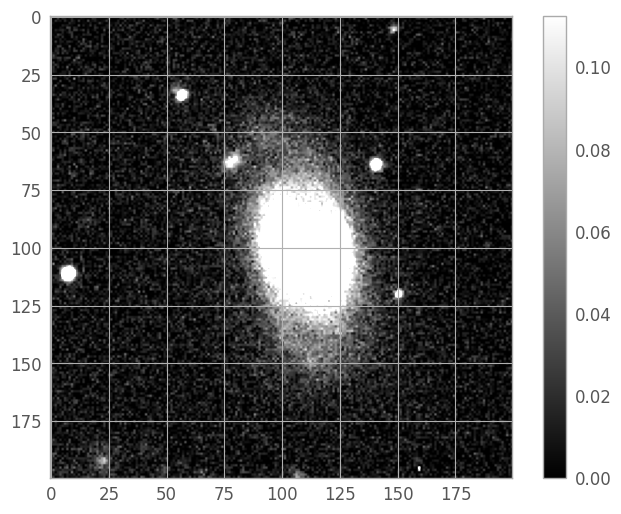

In [ ]:
# Crop the image for NGC7336
NGC7336_g = g_image[:200,300:]
NGC7336_r = r_image[:200,300:]

plt.figure()
plt.imshow(NGC7336_g, cmap='gray', vmin=0, vmax=np.std(NGC7336_g))
plt.colorbar()

# NGC7335 Isophote and Inclination Angle

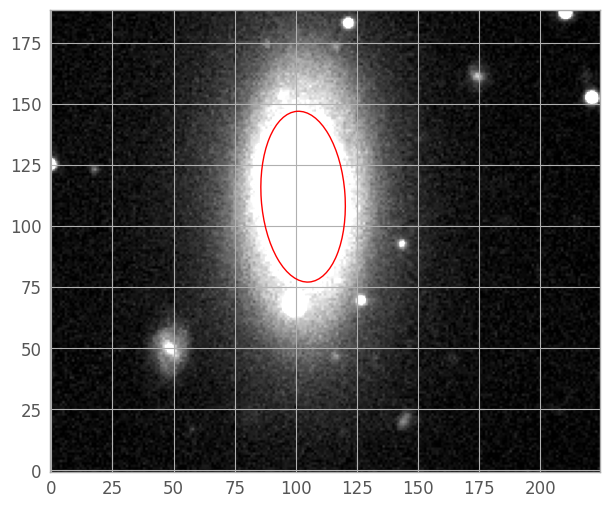

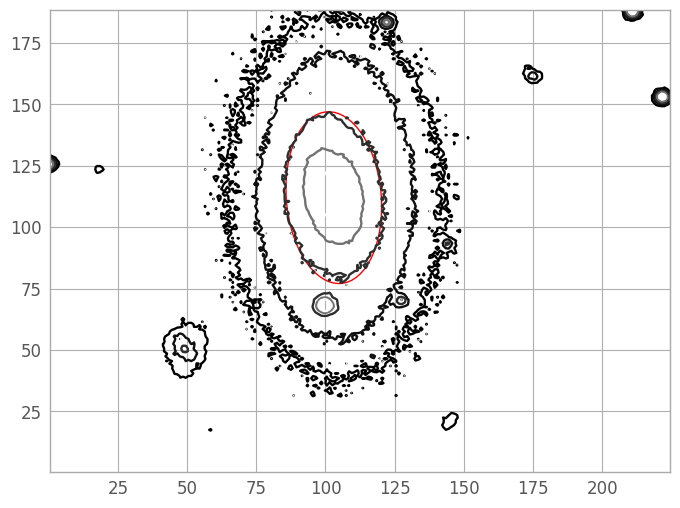

In [ ]:
data = NGC7335_r                                                                 # We use the data from red filter in order to see the galactic feature more clearly

from photutils.isophote import EllipseGeometry
geometry = EllipseGeometry(x0=103, y0=112, sma=35, eps=0.51,                     # Build an elipse model (aperture) to fit the galaxy's feature
                           pa=94.0 * np.pi / 180.0)                              # x0, y0: ellipse center position at the image, sma: semimajor axis in pixel, eps: elipticity, pa: position angle of the ellipse

from photutils.aperture import EllipticalAperture
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,              # Make the aperture from the geometry above
                          geometry.sma * (1 - geometry.eps),
                          geometry.pa)

plt.imshow(data, origin='lower',  cmap='gray', vmin=0, vmax=np.std(data))        # Plot the galaxy image with aperture
aper.plot(color='red')
plt.show()

plt.contour(data, origin='lower',  cmap='gray', levels=np.logspace(-0.8, 0.5, 5))# Plot the galaxy contour image with aperture
aper.plot(color='red')
plt.show()

In [ ]:
"""
data = NGC7336_r

from photutils.isophote import EllipseGeometry
geometry = EllipseGeometry(x0=105, y0=92, sma=45, eps=0.5,
                           pa=80.0 * np.pi / 180.0)

from photutils.aperture import EllipticalAperture
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,
                          geometry.sma * (1 - geometry.eps),
                          geometry.pa)

plt.imshow(data**0.5, origin='lower')
aper.plot(color='white')
"""

"\ndata = NGC7336_r\n\nfrom photutils.isophote import EllipseGeometry\ngeometry = EllipseGeometry(x0=105, y0=92, sma=45, eps=0.5,\n                           pa=80.0 * np.pi / 180.0)\n\nfrom photutils.aperture import EllipticalAperture\naper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,\n                          geometry.sma * (1 - geometry.eps),\n                          geometry.pa)\n\nplt.imshow(data**0.5, origin='lower')\naper.plot(color='white')\n"

In [ ]:
# Creating ellipse model isophotes                                              (https://photutils.readthedocs.io/en/stable/isophote.html)
# Algorithm used (Jedrzejewski, 1987)                                           (https://articles.adsabs.harvard.edu/pdf/1987MNRAS.226..747J)
from photutils.isophote import Ellipse
ellipse = Ellipse(data, geometry)

isolist = ellipse.fit_image()                                                    # isolist contains ellipse elements which make up isophotes 

from photutils.isophote import build_ellipse_model
model_image = build_ellipse_model(data.shape, isolist)                           # galaxy model created from the data and fitted ellipse models 
residual = data - model_image

Text(0.5, 1.0, 'Residual')

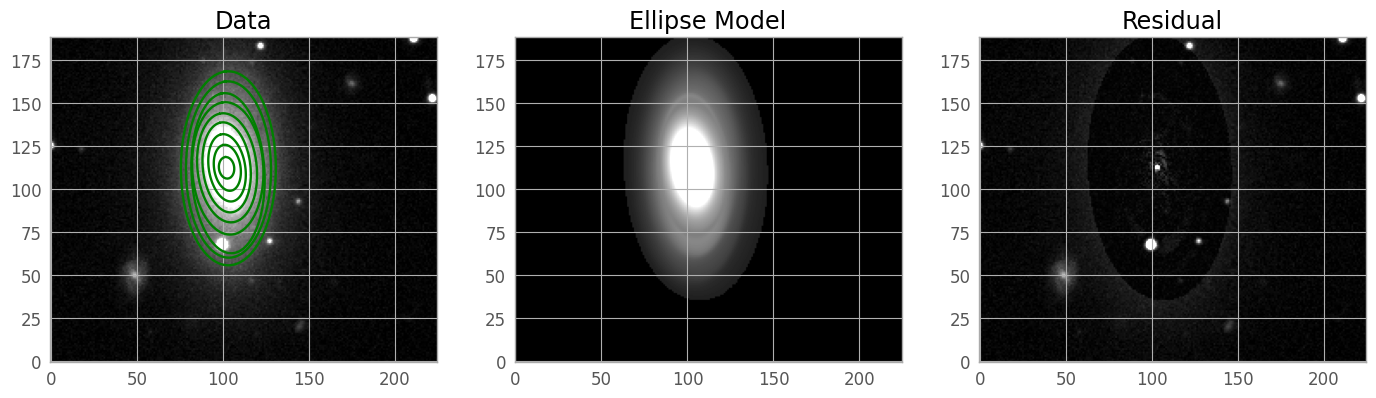

In [ ]:
# Plotting the images
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 5), nrows=1, ncols=3)
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.02, top=0.98)
ax1.imshow(data, origin='lower', cmap='gray', vmin=0, vmax=2*np.std(data))
ax1.set_title('Data')

smas = np.linspace(0, len(isolist), 10)
for sma in smas:
    iso = isolist.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    ax1.plot(x, y, color='green')

ax2.imshow(model_image, origin='lower', cmap='gray', vmin=0, vmax=2*np.std(data))
ax2.set_title('Ellipse Model')

ax3.imshow(abs(residual), origin='lower', cmap='gray', vmin=0, vmax=2*np.std(data))
ax3.set_title('Residual')

In [ ]:
# Calculating inclination
sma = isolist.to_table()[len(isolist)-1][0]                                      # Outermost ellipse was used as best ellipse model to calculate the inclination
e = isolist.to_table()[len(isolist)-1][3]                                        # Same with ellipticity
b = sma - e*sma
inclination = np.arccos(b/sma) * 180 / np.pi                                   

print('sma: ', sma, ',   e: ', e)
print('inclination: ', inclination)
b

sma:  109.8449931852351 ,   e:  0.4507861501716555
inclination:  56.6869035139082


60.32839159163123

In [ ]:
np.sqrt(1- (b/sma)**2)

0.83568184565463

# NGC 7336 Petrosian Magnitude

In [ ]:
# Import required libraries
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

The Petrosian Radius is the $R$ at which  $\frac{1}{η(R)}=0.2$
 , where

\begin{align}
\frac{1}{η(R)} = \frac{πr^2}{\sum_{r}^R I(R)} 
\end{align}

Meanwhile, the Petrosian flux is defined as

\begin{align}
\ Fp = \sum_{r}^{2\ Rp} I(R)
\end{align}
 
Where  $Rp$
  is the Petrosian Radius

In [ ]:
def one_over_eta(rs, fs, R):
    return ((np.pi*R**2) / (np.sum(fs[rs<=R]))) * np.average(fs[rs==R])

def petrosian_radius(rs, fs):
    temp = [one_over_eta(rs, fs, R) for R in rs]
    clean = [x for x in temp if ~np.isnan(x)]
    r_candidates = np.array(clean)
    return rs[np.square(r_candidates-0.2).argmin()]

def petrosian_flux(rs, fs, R_p):
    return np.sum(fs[rs<=2*R_p])

## NGC7336 Red Flux

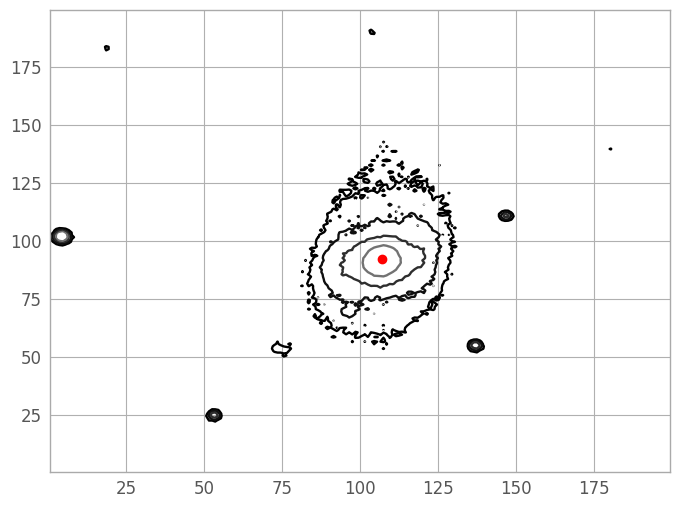

In [ ]:
img =  NGC7336_r
cx, cy = 107, 92                                                                 # Identify galaxy center

plt.contour(img, origin='lower',  cmap='gray', levels=np.logspace(-0.8, 0.5, 5)) # Plot the galaxy contour image with aperture
plt.plot(cx, cy, 'ro')
plt.show()

Petrosian Radius:51.0098029794274
Petrosian Flux:2192.173095703125


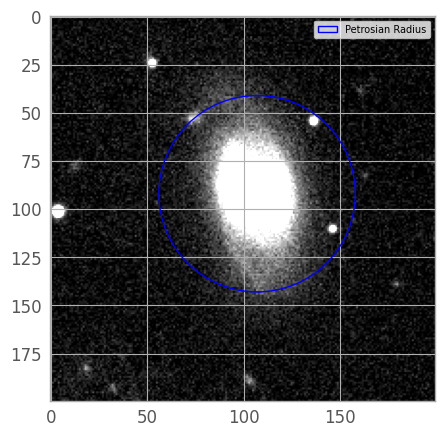

In [ ]:
xs, ys = np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1]).T)
rs = np.sqrt(np.square(xs-cx)+np.square(ys-cy))

rs = rs.flatten()
fs = img.flatten()
sorted_rs = np.argsort(rs)

rs = rs[sorted_rs]
fs = fs[sorted_rs]

R_p = petrosian_radius(rs, fs)
F_p = petrosian_flux(rs, fs, R_p)
NGC7336_r_flux = F_p

print(f'Petrosian Radius:{R_p}')
print(f'Petrosian Flux:{F_p}')

make_cir = lambda r,c: plt.Circle((cx, cy), r, color=c, fill=False)

cir_p_radius = make_cir(R_p, 'b')

f, a = plt.subplots(figsize=(5,5))
a.imshow(img, cmap='gray', vmin=0, vmax=np.std(img))
a.add_artist(cir_p_radius)
a.legend([cir_p_radius],
         ['Petrosian Radius'],
        fontsize=7)
plt.show()

## NGC7336 Green Flux

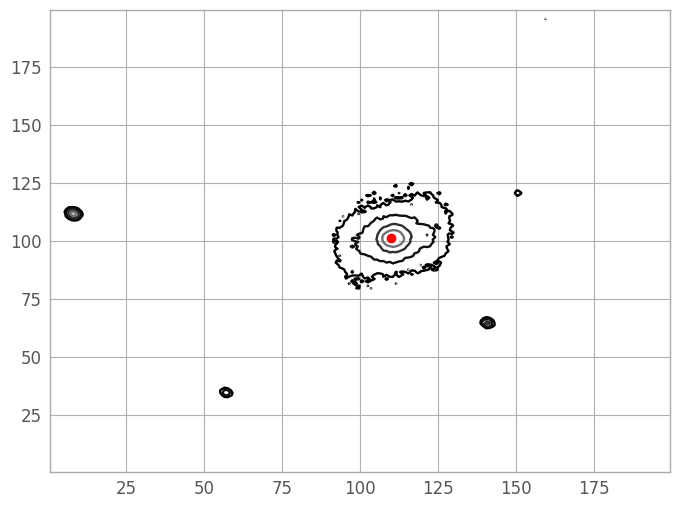

In [ ]:
img =  NGC7336_g
cx, cy = 110, 101                                                                # Identify galaxy center

plt.contour(img, origin='lower',  cmap='gray', levels=np.logspace(-0.8, 0.5, 5)) # Plot the galaxy contour image with aperture
plt.plot(cx, cy, 'ro')
plt.show()

Petrosian Radius:52.009614495783374
Petrosian Flux:1026.083984375


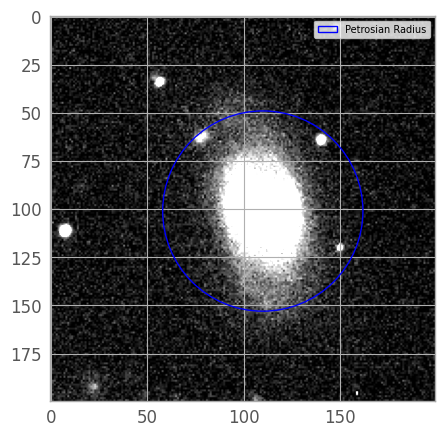

In [ ]:
xs, ys = np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1]).T)
rs = np.sqrt(np.square(xs-cx)+np.square(ys-cy))

rs = rs.flatten()
fs = img.flatten()
sorted_rs = np.argsort(rs)

rs = rs[sorted_rs]
fs = fs[sorted_rs]

R_p = petrosian_radius(rs, fs)
F_p = petrosian_flux(rs, fs, R_p)
NGC7336_g_flux = F_p

print(f'Petrosian Radius:{R_p}')
print(f'Petrosian Flux:{F_p}')

make_cir = lambda r,c: plt.Circle((cx, cy), r, color=c, fill=False)

cir_p_radius = make_cir(R_p, 'b')

f, a = plt.subplots(figsize=(5,5))
a.imshow(img, cmap='gray', vmin=0, vmax=np.std(img))
a.add_artist(cir_p_radius)
a.legend([cir_p_radius],
         ['Petrosian Radius'],
        fontsize=7)
plt.show()

## NGC7335 Red Flux

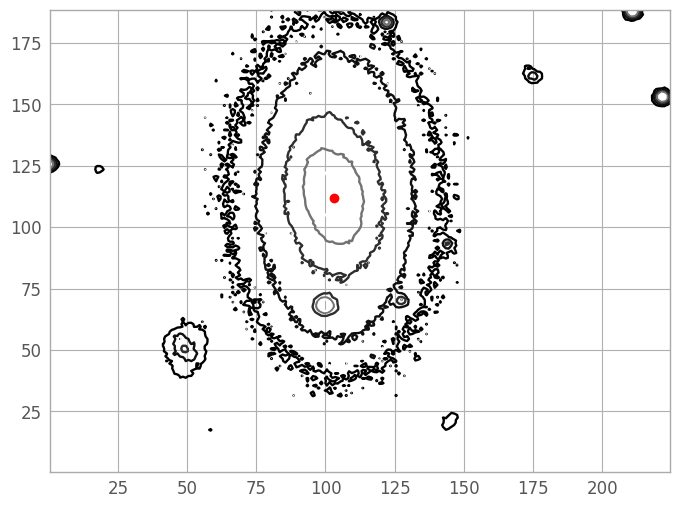

In [ ]:
img =  NGC7335_r
cx, cy = 103, 112                                                                 # Identify galaxy center

plt.contour(img, origin='lower',  cmap='gray', levels=np.logspace(-0.8, 0.5, 5)) # Plot the galaxy contour image with aperture
plt.plot(cx, cy, 'ro')
plt.show()

Petrosian Radius:101.39033484509261
Petrosian Flux:7771.494140625


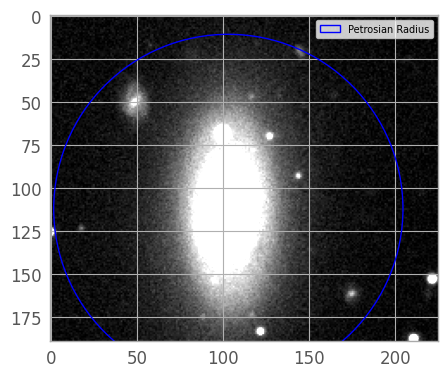

In [ ]:
xs, ys = np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1]).T)
rs = np.sqrt(np.square(xs-cx)+np.square(ys-cy))

rs = rs.flatten()
fs = img.flatten()
sorted_rs = np.argsort(rs)

rs = rs[sorted_rs]
fs = fs[sorted_rs]

R_p = petrosian_radius(rs, fs)
F_p = petrosian_flux(rs, fs, R_p)
NGC7335_r_flux = F_p

print(f'Petrosian Radius:{R_p}')
print(f'Petrosian Flux:{F_p}')

make_cir = lambda r,c: plt.Circle((cx, cy), r, color=c, fill=False)

cir_p_radius = make_cir(R_p, 'b')

f, a = plt.subplots(figsize=(5,5))
a.imshow(img, cmap='gray', vmin=0, vmax=np.std(img))
a.add_artist(cir_p_radius)
a.legend([cir_p_radius],
         ['Petrosian Radius'],
        fontsize=7)
plt.show()

## NGC7335 Green Flux

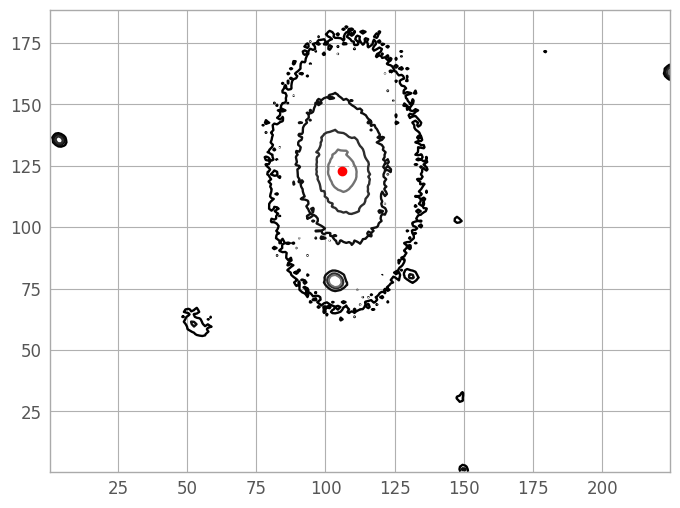

In [ ]:
img =  NGC7335_g
cx, cy = 106, 123                                                                # Identify galaxy center

plt.contour(img, origin='lower',  cmap='gray', levels=np.logspace(-0.8, 0.5, 5)) # Plot the galaxy contour image with aperture
plt.plot(cx, cy, 'ro')
plt.show()

<ipython-input-24-4088f5184fab>:2: RuntimeWarning: invalid value encountered in double_scalars
  return ((np.pi*R**2) / (np.sum(fs[rs<=R]))) * np.average(fs[rs==R])


Petrosian Radius:123.84667940643382
Petrosian Flux:3279.420166015625


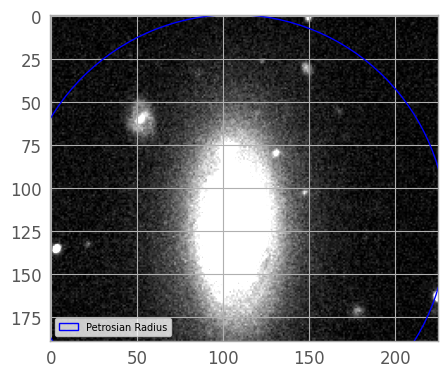

In [ ]:
xs, ys = np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1]).T)
rs = np.sqrt(np.square(xs-cx)+np.square(ys-cy))

rs = rs.flatten()
fs = img.flatten()
sorted_rs = np.argsort(rs)

rs = rs[sorted_rs]
fs = fs[sorted_rs]

R_p = petrosian_radius(rs, fs)
F_p = petrosian_flux(rs, fs, R_p)
NGC7335_g_flux = F_p

print(f'Petrosian Radius:{R_p}')
print(f'Petrosian Flux:{F_p}')

make_cir = lambda r,c: plt.Circle((cx, cy), r, color=c, fill=False)

cir_p_radius = make_cir(R_p, 'b')

f, a = plt.subplots(figsize=(5,5))
a.imshow(img, cmap='gray', vmin=0, vmax=np.std(img))
a.add_artist(cir_p_radius)
a.legend([cir_p_radius],
         ['Petrosian Radius'],
        fontsize=7)
plt.show()

In [ ]:
NGC7335_V = 13.3                                                                             # https://kosmoved.ru/get_ngcic.php?ID=NGC-7335&lang=eng
NGC7335_SDSS_g = NGC7335_V + 0.5784*(-2.5*np.log10(NGC7335_g_flux/NGC7335_r_flux)) + 0.0038  # V to SDSS_g conversion by Lupton (2005)
                                                                                             # https://www.sdss3.org/dr8/algorithms/sdssUBVRITransform.php#Jester2005
NGC7336_SDSS_g = -2.5*np.log10(NGC7336_g_flux/NGC7335_g_flux) + NGC7335_SDSS_g               # Use pogson formula to obtain magnitude of NGC7336 in SDSS g filter

In [ ]:
NGC7336_V = NGC7336_SDSS_g - 0.59*(-2.5*np.log10(NGC7336_g_flux/NGC7336_r_flux)) - 0.01      # SDSS g filter to V filter conversion by Jester et al. (2005)
print(f'NGC7336 magnitude (g):{NGC7336_SDSS_g}')
print(f'NGC7336 magnitude (V):{NGC7336_V}')

NGC7336 magnitude (g):15.107162423658371
NGC7336 magnitude (V):14.61086684651971


In [ ]:
!pip install petrofit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 17.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.9/857.9 kB 30.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for petrofit: filename=petrofit-0.4.1-py3-none-any.whl size=46462 sha256=54aec028034fff514721e4fb6e617339e7c998e98a0538b0fe1bf94d60164227
  Stored in directory: /root/.cache/pip/wheels/8a/67/35/3cbab4af0a791fbd4a11715da3f42c86243ad0340416b90b22
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=28df24c3e24c2f902f77e7231f9c008ef954e6e960f1d761cf22bab47cdad057
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built petrofit sklearn
